<b>Apollo 13 Transcript Exploratory Analysis</b>

The goal is to examine the transcript from the Apollo 13 mission to see if any interesting insights can be gleamed. The Apollo 13 was the famous mission to the moon that almost ended in disaster when an oxygen tank on board exploded.

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_table('cleanedData.txt')
df.head()

,time,speaker,text
0,000:00:02,CDR,The clock is running.
1,000:00:03,CMP,"Okay. P11, Jim."
2,000:00:05,CDR,Yaw program.
3,000:00:12,CMP,Clear the tower.
4,000:00:14,CDR,Yaw complete. Roll program.


First, lets take a look at how many messages were sent by each speaker in descending order.

In [14]:
speakerCounts = df.groupby('speaker').size().sort_values(ascending = False)
print speakerCounts

speaker
CC     4805
CDR    2333
LMP    1942
CMP    1732
F        21
SC       20
R        10
IWO       6
S-2       2
S-l       1
S-1       1
R-l       1
P-l       1
P-1       1
dtype: int64


On lines 76-93 of the original text file lists the meaning of these acronyms.

Spacecraft:
* CDR - Commander - James A. (Jim) Lovell, Jr.
* CMP - Command module pilot - John L. Swigert, Jr.
* LMP - Lunar module pilot - Fred W. Haise, Jr.
* SC - Unidentified crewmember

Mission Control Centers:
* CC - Capsule communicator (CAP COMM)
* F - Flight director
* S - Surgeon

Remote sites:
* IWO - USS Iwo Jima
* P-l, P-2, etc.            Photographic helicopters
* R-l, R-2, etc.            Recovery helicopters

The multiples of S-1/S-L and P-1/P-L are most likely just transcription errors where an L was used instead of a 1.

The messages from the astronauts and the Cap Comm seem to dwarf everything else, so lets make a bar plot of using only that data.

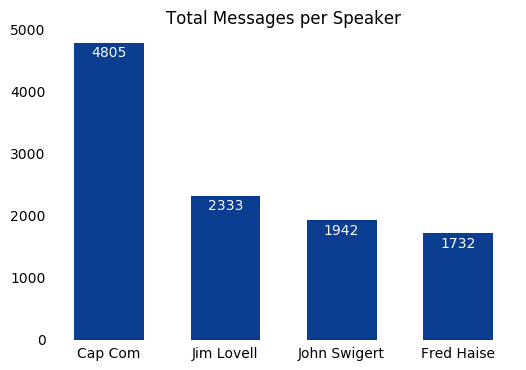

In [32]:
speakerCounts = speakerCounts.iloc[0:4]
xPos = range(len(speakerCounts)) # create a range of numbers for each bar in bar plot

plt.bar(xPos, speakerCounts,
        color='#0B3D91', # NASA blue
        align='center',
        linewidth=0, 
        width=0.6,
        zorder=2)

names = ['Cap Com', 'Jim Lovell', 'John Swigert', 'Fred Haise']
plt.xticks(xPos, names) # placing name labels
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on") # removing tick marks 
plt.title('Total Messages per Speaker') # add title

# removing borders
ax = plt.gca()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

# adding labels on each bar
rects = ax.patches
labels = speakerCounts
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height-50, label, ha='center', va='top', color='white')
    
plt.show()

I defined a few more columns to make dealing with time throughout the notebook a little easier. One being the total time elapsed in seconds, the other being what hour of the mission it is.

In [33]:
df['seconds'] = df.time.str.split(':').apply( lambda x: int(x[0]) * 3600 + int(x[1]) * 60 + int(x[2]) )
df['hour'] = df.time.str.split(':').apply( lambda x: int(x[0]) )

df.head()

,time,speaker,text,seconds,hour
0,000:00:02,CDR,The clock is running.,2,0
1,000:00:03,CMP,"Okay. P11, Jim.",3,0
2,000:00:05,CDR,Yaw program.,5,0
3,000:00:12,CMP,Clear the tower.,12,0
4,000:00:14,CDR,Yaw complete. Roll program.,14,0


The next thing I wanted to look at was the length of each message and to plot these values over the mission.

In [51]:
df['length'] = df.text.str.len() # adding a column to dataframe to represent length of each message
df.head()

,time,speaker,text,seconds,hour,length
0,000:00:02,CDR,The clock is running.,2,0,21
1,000:00:03,CMP,"Okay. P11, Jim.",3,0,15
2,000:00:05,CDR,Yaw program.,5,0,12
3,000:00:12,CMP,Clear the tower.,12,0,16
4,000:00:14,CDR,Yaw complete. Roll program.,14,0,27


Before I plot I wanted to find the famous <i>"Houston, we've had a problem"</i> message so I could highlight it in the plot. This is the point where the one of the spacecrafts oxygen tanks blew up.

In [55]:
problem = df[df.text == "Houston, we've had a problem. We've had a MAIN B BUS UNDERVOLT."]
problem # print

,time,speaker,text,seconds,hour,length
2199,055:55:35,CDR,"Houston, we've had a problem. We've had a MAIN...",201335,55,63


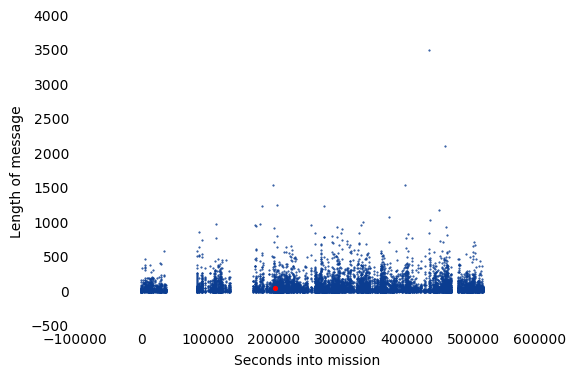

In [56]:
plt.scatter(df.seconds, df.length,
            marker = '.', 
            color = '#0B3D91',
            s = 1)
plt.xlabel('Seconds into mission') # add xlabel
plt.ylabel('Length of message') # ylabel
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on") # removing tick marks 

# removing borders
ax = plt.gca()
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.scatter(problem.seconds,problem.length,
           marker = '.',
           color = 'red', # change color to red to stand out
           s = 30) # make size larger to stand out
plt.show()